<a href="https://colab.research.google.com/github/athanpetroo/Petropoulos_Teliki_Ergasia/blob/main/twitter_search.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Φορτώνουμε τα δεδομένα μας από το Google Drive.



In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import numpy as np 

In [ ]:
df =pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/covid_search.tsv", sep='\t')

In [ ]:
df

Unnamed: 0  ... quoted_status
0              0  ...           NaN
1              1  ...           NaN
2              2  ...           NaN
3              3  ...           NaN
4              4  ...           NaN
...          ...  ...           ...
3895        3895  ...           NaN
3896        3896  ...           NaN
3897        3897  ...           NaN
3898        3898  ...           NaN
3899        3899  ...           NaN

[3900 rows x 31 columns]

In [ ]:
short_tweets = df[['created_at','text' ]]

In [ ]:
short_tweets.head()

created_at                                               text
0  Tue Jul 06 08:09:32 +0000 2021  Κορονοϊός: Το Ισραήλ και η Νότια Κορέα συμφωνο...
1  Tue Jul 06 08:05:32 +0000 2021  RT @sofokleous10: Κορονοϊός: Το Ισραήλ και η Ν...
2  Tue Jul 06 08:05:04 +0000 2021  Κορονοϊός: Το Ισραήλ και η Νότια Κορέα συμφωνο...
3  Tue Jul 06 08:05:03 +0000 2021  Κορονοϊός: Εμβολιασμός παιδιών και περιμυοκαρδ...
4  Tue Jul 06 08:02:31 +0000 2021  @aftolykos1 @tarrott Αυτοι που απο την αρχη ελ...

In [ ]:
short_tweets.tail()

created_at                                               text
3895  Wed Jun 30 15:00:52 +0000 2021  Κορονοϊός: 633 νέα κρούσματα, τα 315 στην Αττι...
3896  Wed Jun 30 14:59:57 +0000 2021  #covid19gr #κορωνοιος #κορονοιος #lockdown2gr\...
3897  Wed Jun 30 14:59:55 +0000 2021  [Κλικ και διαβάστε στο eleftherostypos] #Έκτακ...
3898  Wed Jun 30 14:59:24 +0000 2021  RT @amna_news: #Κορονοϊός #Ελλάδα: 633 νέα κρο...
3899  Wed Jun 30 14:58:27 +0000 2021  Κορονοϊός (30/6): 11 θάνατοι στη χώρα – 3 νέα ...

In [ ]:
short_tweets.dtypes

created_at    object
text          object
dtype: object

Μετατρέπουμε την ημερομηνία σε επεξεργάσιμη μορφή.

In [ ]:
short_tweets['created_at'] = pd.to_datetime(short_tweets['created_at'], format='%a %b %d %H:%M:%S +0000 %Y')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
short_tweets.dtypes

created_at    datetime64[ns]
text                  object
dtype: object

In [ ]:
short_tweets.head()

created_at                                               text
0 2021-07-06 08:09:32  Κορονοϊός: Το Ισραήλ και η Νότια Κορέα συμφωνο...
1 2021-07-06 08:05:32  RT @sofokleous10: Κορονοϊός: Το Ισραήλ και η Ν...
2 2021-07-06 08:05:04  Κορονοϊός: Το Ισραήλ και η Νότια Κορέα συμφωνο...
3 2021-07-06 08:05:03  Κορονοϊός: Εμβολιασμός παιδιών και περιμυοκαρδ...
4 2021-07-06 08:02:31  @aftolykos1 @tarrott Αυτοι που απο την αρχη ελ...

In [ ]:
short_tweets['text'] = short_tweets['text'].str.replace(r'https?:\/\/.*[\r\n]*'," ")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Πραγματοποιούμε σύννεφο λέξεων (wordcloud).

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt


In [ ]:
text = short_tweets['text'].str.cat(sep = ' ').replace("amp", ' ')


In [ ]:
text = short_tweets['text'].str.replace('ά','α').str.replace("έ", "ε").str.replace('ή','η').str.replace('ί','ι').str.replace('ό','ο').str.replace('ύ','υ').str.replace('ώ','ω')


In [ ]:
text

'Κορονοϊός: Το Ισραήλ και η Νότια Κορέα συμφωνούν για την ανταλλαγή εμβολίων   RT @sofokleous10: Κορονοϊός: Το Ισραήλ και η Νότια Κορέα συμφωνούν για την ανταλλαγή εμβολίων   Κορονοϊός: Το Ισραήλ και η Νότια Κορέα συμφωνούν για την ανταλλαγή εμβολίων   Κορονοϊός: Εμβολιασμός παιδιών και περιμυοκαρδίτιδα- ΒΙΝΤΕΟ   @aftolykos1 @tarrott Αυτοι που απο την αρχη ελεγαν οτι δεν υπαρχει κορονοϊος RT @neweuropegr: #ΥΓΕΙΑ #Κορονοϊός Αύξηση των κρουσμάτων κατά 266% – το τέταρτο κύμα της πανδημίας προ των πυλών   Κορονοϊός: Τα υπέρ και τα κατά του εμβολιασμού παιδιών– Τι ισχύει στις άλλες χώρες του κόσμου -…   RT @anasakamou: Ο αρχικός κορονοϊός μεταδιδόταν σε 15 λεπτά στενής επαφής σε κλειστό χώρο. Η μετάλλαξη Δέλτα σε πετυχαίνει από τα είκοσι μέ… Τι ανέφερε το μέλος της Επιτροπής των Ειδικών #κορονοιος   RT @apokalyptikodel: Κορονοϊός – Κούβελας: Tα εμβόλια δεν προστατεύουν από την μόλυνση @velopky @ellinikilisi \n  RT @amangiriadis: Κορονοϊός: Τι προβλέπει το κυβερνητικό σχέδιο για αύξηση εμβολ

In [ ]:
list(STOPWORDS)[0:20]

['i',
 'theirs',
 "they're",
 'get',
 'should',
 'him',
 'and',
 'very',
 "we'll",
 'here',
 'their',
 'whom',
 "doesn't",
 'than',
 "there's",
 "mustn't",
 "aren't",
 'ought',
 'be',
 'do']

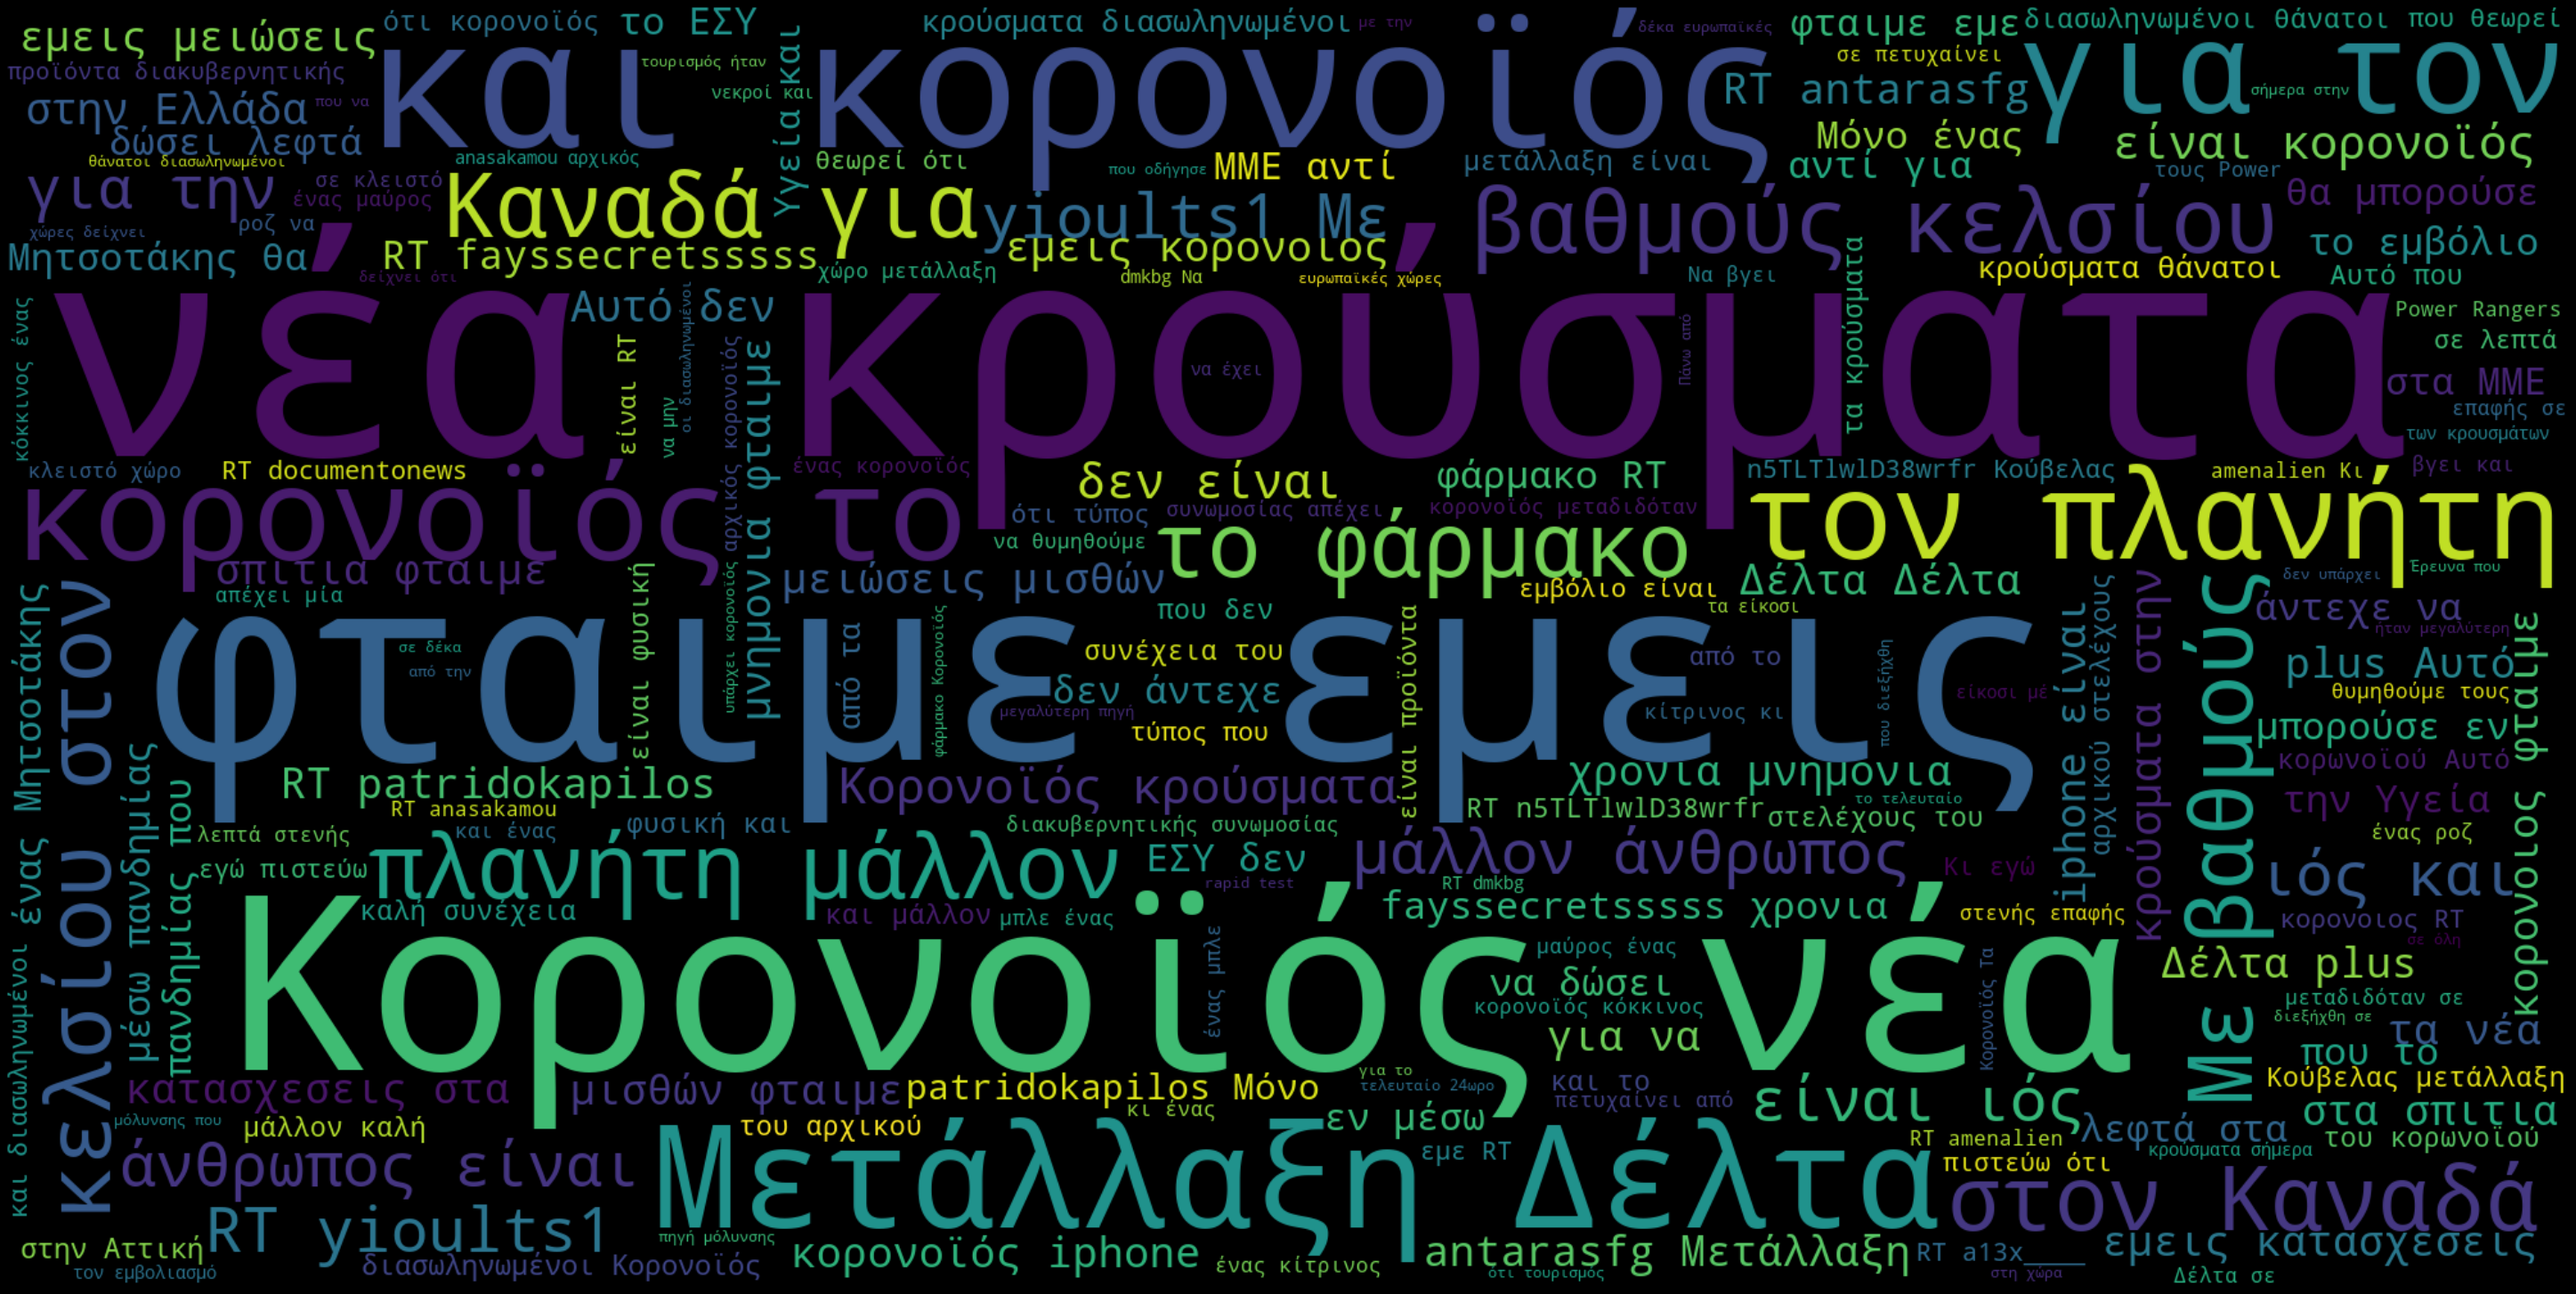

In [ ]:
wordcloud = WordCloud(
#   stopwords = STOPWORDS,
    width = 2000,
    height = 1000,
    background_color = 'black'
 ).generate(text)
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [ ]:
import spacy

In [ ]:
!python -m spacy download el_core_news_sm


     |████████████████████████████████| 11.4MB 25.3MB/s 
  Created wheel for el-core-news-sm: filename=el_core_news_sm-2.2.5-cp37-none-any.whl size=11422785 sha256=d7bf3e001fba48bb1a65148303f0c958a346375c9df7fa5db5d7f8e04a189adb
  Stored in directory: /tmp/pip-ephem-wheel-cache-p5mb7gcp/wheels/70/a1/c5/6690d6b524d87e287a8070cf957f834fb1b1665b9ede11348b
Successfully built el-core-news-sm
✔ Download and installation successful
You can now load the model via spacy.load('el_core_news_sm')


In [ ]:
nlp = spacy.load('el_core_news_sm')

In [ ]:
list(nlp.Defaults.stop_words)[0:20]

['για',
 'οσησδήποτε',
 'ετούτοι',
 'απ',
 'καμίαν',
 'μόνους',
 'όσον',
 'εξήσ',
 'αυτές',
 'αι',
 'οποιδήποτε',
 'ποιός',
 'ήσαστε',
 'κάμποσα',
 'λιγάκι',
 'μόλις',
 'εκτός',
 'εχτές',
 'όμως',
 'κάποια']

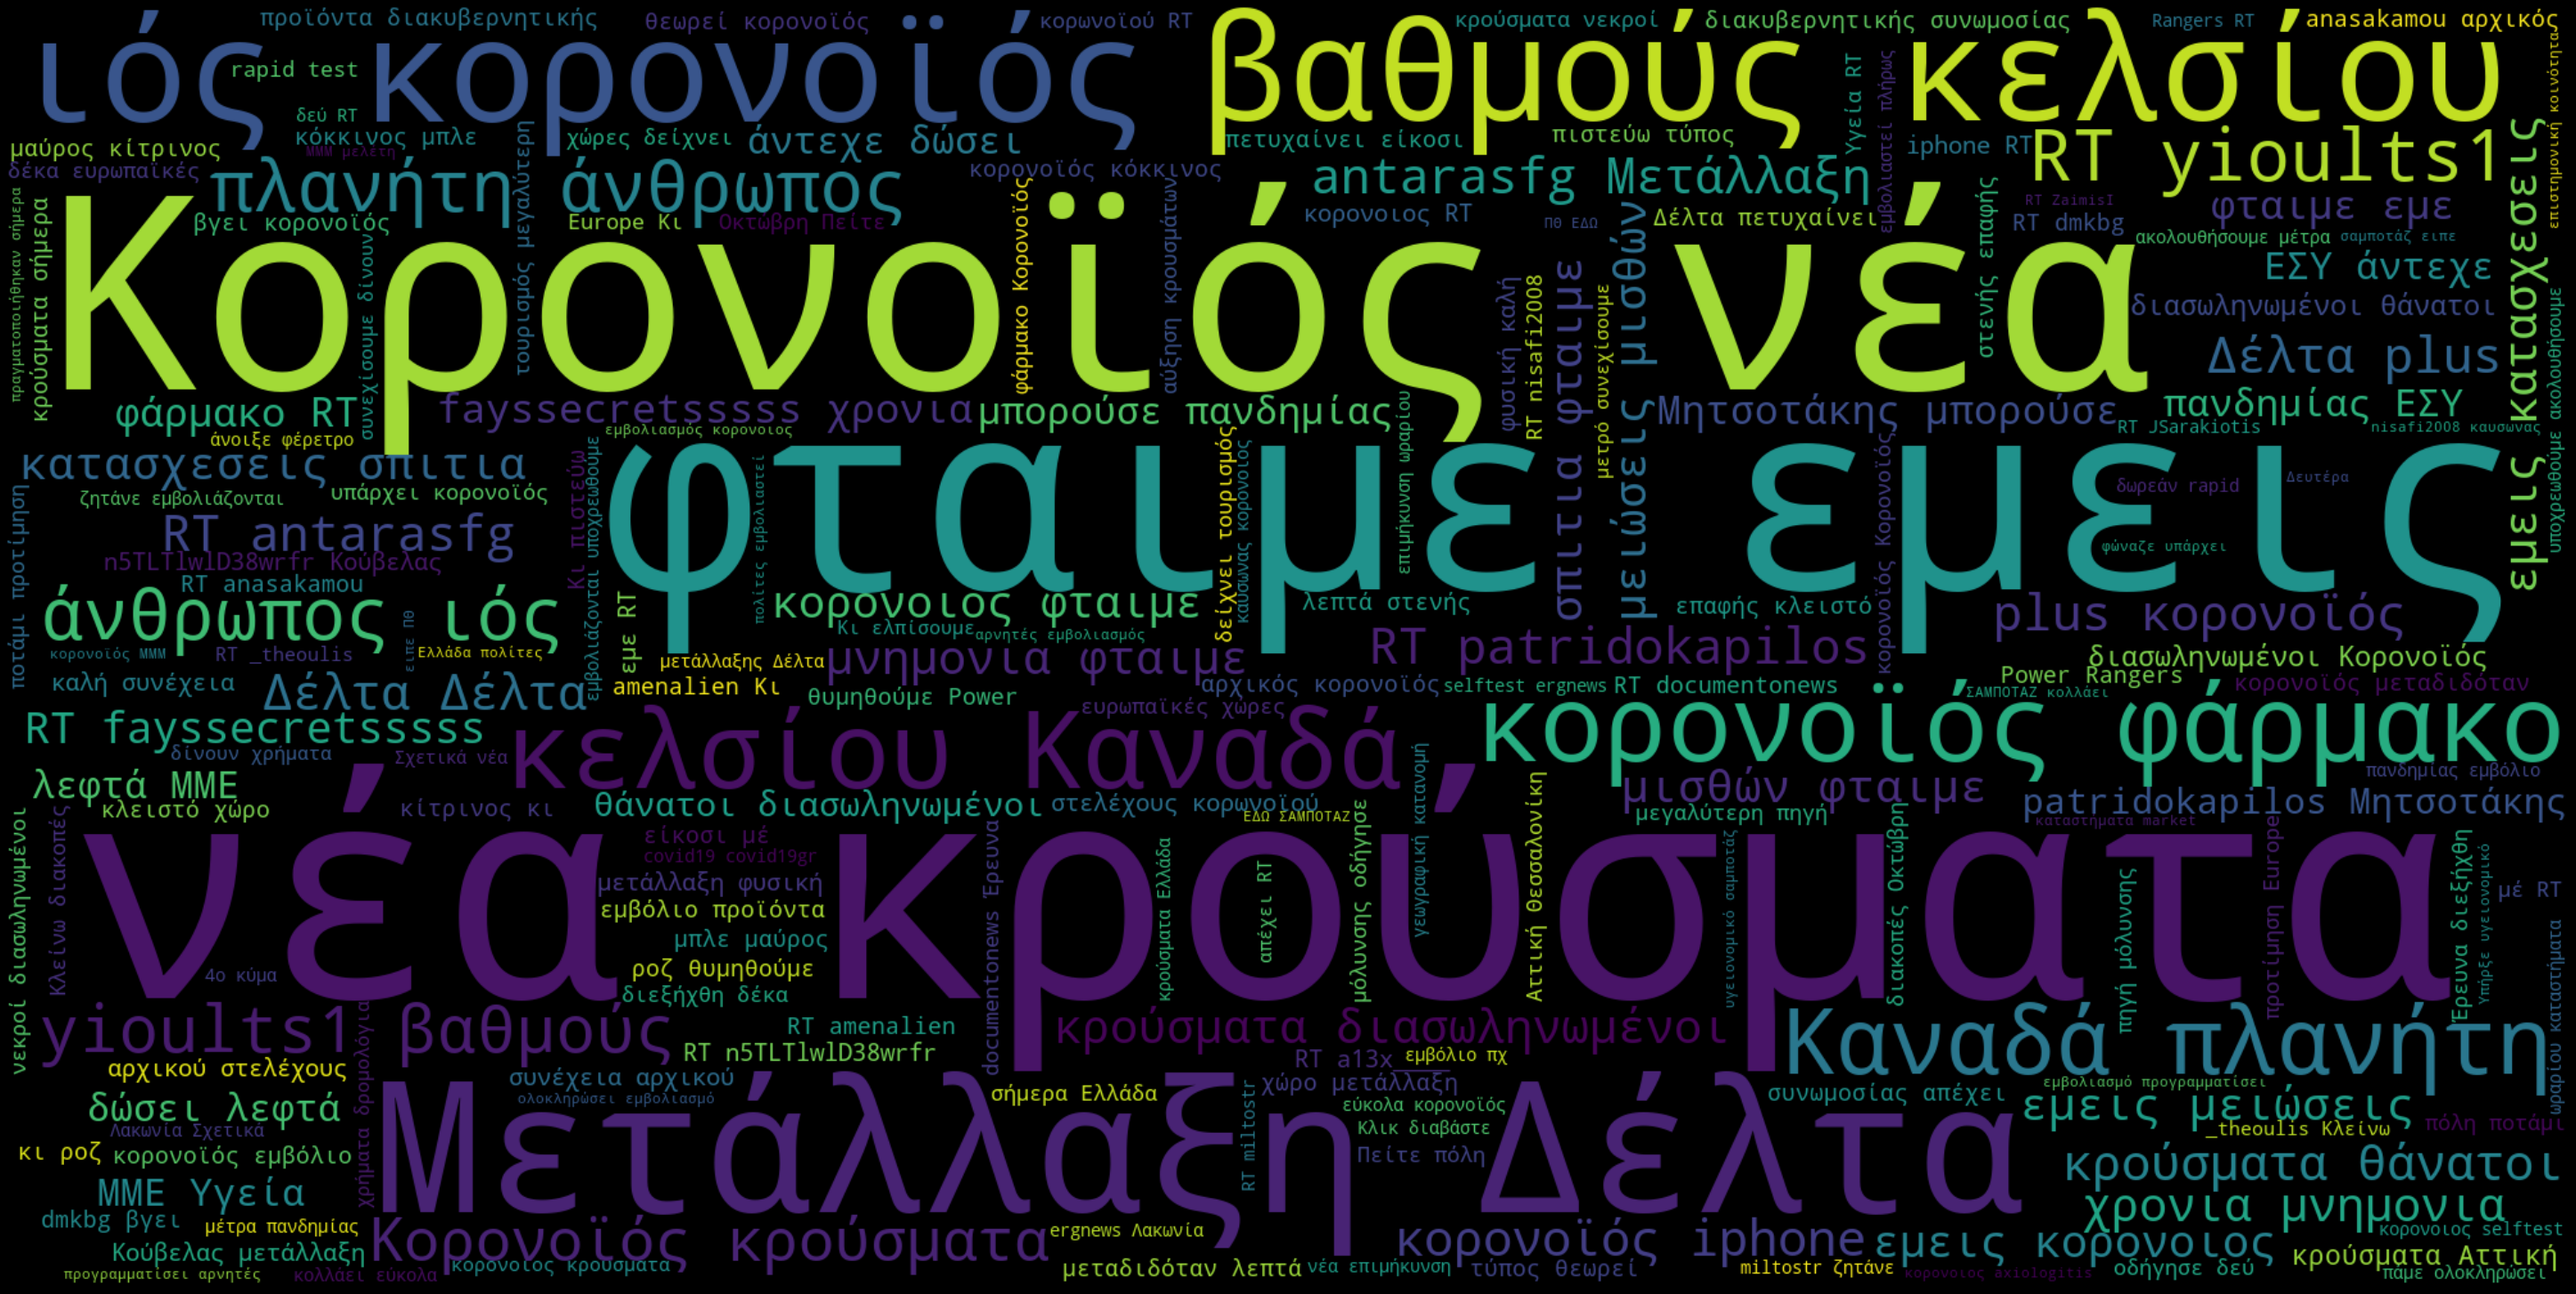

In [ ]:
wordcloud = WordCloud(
    stopwords = nlp.Defaults.stop_words,
    width = 2000,
    height = 1000,
    background_color = 'black'
 ).generate(text)
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

Προχωράμε με την οπτικοποίηση διάφορων γραφημάτων.


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [ ]:
count_vector = cv.fit_transform(df['text'])

In [ ]:
count_vector.shape

(3900, 7239)

In [ ]:
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 

results.head()

00  000  0004  001  002  01  016  ...  όψιν  ύπ  ύπνο  ύψη  ύψους  ώρα  ώρες
0   0    0     0    0    0   0    0  ...     0   0     0    0      0    0     0
1   0    0     0    0    0   0    0  ...     0   0     0    0      0    0     0
2   0    0     0    0    0   0    0  ...     0   0     0    0      0    0     0
3   0    0     0    0    0   0    0  ...     0   0     0    0      0    0     0
4   0    0     0    0    0   0    0  ...     0   0     0    0      0    0     0

[5 rows x 7239 columns]

In [ ]:
cv = CountVectorizer(stop_words= nlp.Defaults.stop_words, min_df=0.01, max_df=0.95)

In [ ]:
count_vector = cv.fit_transform(df['text'])

In [ ]:
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 

results.head()

000  001  10  1001  11  12  ...  φυσική  χρονια  χώρα  χώρες  χώρο  ώρες
0    0    0   0     0   0   0  ...       0       0     0      0     0     0
1    0    0   0     0   0   0  ...       0       0     0      0     0     0
2    0    0   0     0   0   0  ...       0       0     0      0     0     0
3    0    0   0     0   0   0  ...       0       0     0      0     0     0
4    0    0   0     0   0   0  ...       0       0     0      0     0     0

[5 rows x 173 columns]

In [ ]:
from html import unescape
def my_tokenizer(doc):
            
    
    doc_clean = unescape(doc).lower()
    tokens = nlp(doc_clean)
    lemmatized_tokens = [token.lemma_ for token in tokens if (len(str(token.lemma_))>2)]
            
  
    return(lemmatized_tokens)

In [ ]:
cv = CountVectorizer(stop_words= nlp.Defaults.stop_words, min_df=0.01, max_df=0.95, tokenizer=my_tokenizer)
count_vector = cv.fit_transform(df['text'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
\
results.head()

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['έγκαιρος', 'έκαστε', 'έξαφνος', 'έτερου', 'ίσιος', 'αδιάκοπας', 'αλλιώτικο', 'αλλοιώτικο', 'αφότο', 'βεβαιότατας', 'γρήγορο', 'δίχω', 'εαυτός', 'εκάστο', 'ετού', 'ετούτε', 'ευθύ', 'εχτέ', 'ιδίο', 'κάμποσε', 'κάνω', 'καθενό', 'κανενό', 'μέλλομαι', 'μεμιά', 'μερικού', 'μερικός', 'μπορώ', 'μόνε', 'ολωσδιόλο', 'ολόγυρας', 'ορισμένος', 'ορισμένω', 'ποί', 'ποιή', 'ποιώ', 'πολλός', 'προχθή', 'προχτής', 'πόσα', 'πόσο', 'σει', 'στος', 'συχνά', 'ταύτο', 'τούτε', 'τόσε', 'όποιας', 'όσε'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


...  1.001  1001  173  177  ...  χρειάζομαι  χρονι  χώρα  χώρο  ώρες
0    0      0     0    0    0  ...           0      0     0     0     0
1    0      0     0    0    0  ...           0      0     0     0     0
2    0      0     0    0    0  ...           0      0     0     0     0
3    0      0     0    0    0  ...           0      0     0     0     0
4    0      0     0    0    0  ...           0      0     0     0     0

[5 rows x 163 columns]

In [ ]:
results.sum(axis =0).sort_values(ascending = False).head(16)#.plot(kind='barh', color='red')

κορονοϊός         2305
κρούσματας         769
νέος               590
κορονοιος          564
φταιμε             408
μετάλλαξη          350
εμει               306
εμβόλιο            297
δέλτα              257
θάνατοι            243
διασωληνωμένος     242
εμβολιασμος        223
σήμερα             212
πανδημία           204
φάρμακο            189
ιός                183
dtype: int64

In [ ]:
sum_words =  results.sum(axis =0)
sum_words.sort_values(ascending = False).head()   

κορονοϊός     2305
κρούσματας     769
νέος           590
κορονοιος      564
φταιμε         408
dtype: int64

In [ ]:
cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=20, #ngram_range=(1, 2), 
 #                    token_pattern = '(\\bκ[οω]ρ[οω]ν[α-ωά-ώ]+\\b') )\| (\\bκυβ[α-ωά-ώ]\\b) #, tokenizer=my_tokenizer)
                     token_pattern = '\\bcov[a-z0-9-_]*\\b') #, tokenizer=my_tokenizer)
count_vector = cv.fit_transform(short_tweets['text'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results.head()

cov  cov-2  covid  covid-19  ...  covid_19gr  covid_free  covidcake  covidiots
0    0      0      0         0  ...           0           0          0          0
1    0      0      0         0  ...           0           0          0          0
2    0      0      0         0  ...           0           0          0          0
3    0      0      0         0  ...           0           0          0          0
4    0      0      0         0  ...           0           0          0          0

[5 rows x 18 columns]

In [ ]:
results.sum(axis =0).sort_values(ascending = False)

covid19          72
covid19gr        64
covid-19         31
covid_19gr       28
covid_19         25
covid            20
covid19greece    18
covid_free        4
covid19_gr        3
covid19crete      2
covidiots         1
covid-free        1
cov-2             1
covid19france     1
covidcake         1
covid19uk         1
covid2019         1
cov               1
dtype: int64

In [ ]:
cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=20, #ngram_range=(1, 2), 
                     vocabulary = ['covid19', 'κυβέρνηση']) #, tokenizer=my_tokenizer)
count_vector = cv.fit_transform(short_tweets['text'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results.head()

covid19  κυβέρνηση
0        0          0
1        0          0
2        0          0
3        0          0
4        0          0

In [ ]:
cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=20, ngram_range=(2, 2) ) #token_pattern = '\\bκυ[α-ωά-ώ]*\\b') #, tokenizer=my_tokenizer)
count_vector = cv.fit_transform(short_tweets['text'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results.head()

177 διασωληνωμένοι  50 βαθμούς  ...  πλανήτη άνθρωπος  φταιμε εμεις
0                   0           0  ...                 0             0
1                   0           0  ...                 0             0
2                   0           0  ...                 0             0
3                   0           0  ...                 0             0
4                   0           0  ...                 0             0

[5 rows x 20 columns]

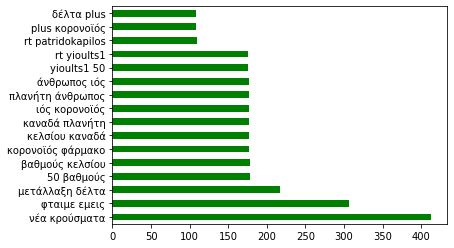

In [ ]:
results.sum(axis =0).sort_values(ascending = False).head(16).plot(kind='barh', color='green')

Ακολουθεί η συναισθηματική ανάλυση των κειμένων.

In [ ]:
filepath = "https://raw.githubusercontent.com/datajour-gr/Data_journalism/master/week10/NRC_GREEK_Translated_6_2020.csv"
emolex_df = pd.read_csv(filepath)
emolex_df.head()

word  Positive  Negative  Anger  ...  Joy  Sadness  Surprise  Trust
0            αφεση       1.0       0.0    0.0  ...  0.0      0.0       0.0    0.0
1  ενορκη βεβαιωση       0.0       0.0    0.0  ...  0.0      0.0       0.0    0.0
2          εχοντας       0.0       0.0    0.0  ...  0.0      0.0       0.0    0.0
3              εχω       0.0       0.0    0.0  ...  0.0      0.0       0.0    0.0
4             οριο       0.0       0.0    0.0  ...  0.0      0.0       0.0    0.0

[5 rows x 11 columns]

In [ ]:
emolex_df.tail()

word  Positive  Negative  Anger  ...  Joy  Sadness  Surprise  Trust
13166     ουρλιασμα       0.0       1.0    1.0  ...  0.0      0.0       1.0    0.0
13167  κροκος αυγου       0.0       0.0    0.0  ...  0.0      0.0       0.0    0.0
13168      νεοτερος       1.0       0.0    0.0  ...  0.0      0.0       0.0    0.0
13169       ζεφυρος       0.0       0.0    0.0  ...  0.0      0.0       0.0    0.0
13170          ζουμ       0.0       0.0    0.0  ...  0.0      0.0       0.0    0.0

[5 rows x 11 columns]

In [ ]:
emolex_df = emolex_df.drop_duplicates(subset=['word'])
emolex_df = emolex_df.dropna()
emolex_df.reset_index(inplace = True)

In [ ]:
emolex_df.tail()


index          word  Positive  Negative  ...  Joy  Sadness  Surprise  Trust
13156  13166     ουρλιασμα       0.0       1.0  ...  0.0      0.0       1.0    0.0
13157  13167  κροκος αυγου       0.0       0.0  ...  0.0      0.0       0.0    0.0
13158  13168      νεοτερος       1.0       0.0  ...  0.0      0.0       0.0    0.0
13159  13169       ζεφυρος       0.0       0.0  ...  0.0      0.0       0.0    0.0
13160  13170          ζουμ       0.0       0.0  ...  0.0      0.0       0.0    0.0

[5 rows x 12 columns]

In [ ]:
len(df)

3900

In [ ]:
vec = CountVectorizer(analyzer = 'word', vocabulary = emolex_df.word, 
                      strip_accents = 'unicode',  
                      stop_words= nlp.Defaults.stop_words,
                      ngram_range=(1, 2))

In [ ]:
matrix = vec.fit_transform(short_tweets['text'])
vocab = vec.get_feature_names()
wordcount_df = pd.DataFrame(matrix.toarray(), columns=vocab)
wordcount_df.head()

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['αδιακοπα', 'ακομα', 'ακομη', 'ακριβως', 'αλλα', 'αλλαχου', 'αλλες', 'αλλη', 'αλλην', 'αλλης', 'αλλιως', 'αλλιωτικα', 'αλλο', 'αλλοι', 'αλλοιως', 'αλλοιωτικα', 'αλλον', 'αλλος', 'αλλοτε', 'αλλου', 'αλλους', 'αλλων', 'αμα', 'αμεσα', 'αμεσως', 'ανα', 'αναμεσα', 'αναμεταξυ', 'ανευ', 'αντι', 'αντιπερα', 'αντις', 'ανω', 'ανωτερω', 'αξαφνα', 'απεναντι', 'απο', 'αποψε', 'αρα', 'αραγε', 'αρκετα', 'αρκετες', 'αρχικα', 'αυριο', 'αυτα', 'αυτες', 'αυτη', 'αυτην', 'αυτης', 'αυτο', 'αυτοι', 'αυτον', 'αυτος', 'αυτου', 'αυτους', 'αυτων', 'αφοτου', 'αφου', 'βεβαια', 'βεβαιοτατα', 'γιατι', 'γρηγορα', 'γυρω', 'δεινα', 'δεξια', 'δηθεν', 'δηλαδη', 'διαρκως', 'δικα', 'δικο', 'δικοι', 'δικος', 'δικου', 'δικους', 'διολου', 'διπλα', 'διχως', 'εαν', 'εαυτο', 'εαυτον', 'εαυτου', 'εαυτους', 'εαυτων', 'εγιναν', 'εγινε', 

αφεση  ενορκη βεβαιωση  εχοντας  εχω  ...  κροκος αυγου  νεοτερος  ζεφυρος  ζουμ
0      0                0        0    0  ...             0         0        0     0
1      0                0        0    0  ...             0         0        0     0
2      0                0        0    0  ...             0         0        0     0
3      0                0        0    0  ...             0         0        0     0
4      0                0        0    0  ...             0         0        0     0

[5 rows x 13161 columns]

In [ ]:
wordcount_df.shape

(3900, 13161)

In [ ]:
emolex_df.head()

index             word  Positive  Negative  ...  Joy  Sadness  Surprise  Trust
0      0            αφεση       1.0       0.0  ...  0.0      0.0       0.0    0.0
1      1  ενορκη βεβαιωση       0.0       0.0  ...  0.0      0.0       0.0    0.0
2      2          εχοντας       0.0       0.0  ...  0.0      0.0       0.0    0.0
3      3              εχω       0.0       0.0  ...  0.0      0.0       0.0    0.0
4      4             οριο       0.0       0.0  ...  0.0      0.0       0.0    0.0

[5 rows x 12 columns]

In [ ]:
emolex_df[emolex_df.Anger == 1].tail()

index          word  Positive  Negative  ...  Joy  Sadness  Surprise  Trust
13094  13104      διεξοδος       0.0       0.0  ...  0.0      0.0       0.0    0.0
13096  13106        ζωυφια       0.0       1.0  ...  0.0      0.0       0.0    0.0
13100  13110    θυματοποιω       0.0       1.0  ...  0.0      1.0       1.0    0.0
13128  13138  αποτυχημενος       0.0       1.0  ...  0.0      0.0       0.0    0.0
13156  13166     ουρλιασμα       0.0       1.0  ...  0.0      0.0       1.0    0.0

[5 rows x 12 columns]

In [ ]:
# Φτιάξε μια λίστα με positive words

angry_words = emolex_df[emolex_df.Anger == 1]['word']

positive_words = emolex_df[emolex_df.Positive == 1]['word']


# Φτιάξε μια λίστα με sadness words
sadness_words = emolex_df[emolex_df.Sadness == 1]['word']


# Φτιάξε μια λίστα με surprise words
surprise_words = emolex_df[emolex_df.Surprise == 1]['word']


# Φτιάξε μια λίστα με disgust words
disgust_words = emolex_df[emolex_df.Disgust == 1]['word']


# Φτιάξε μια λίστα με anticipation words
anticipation_words = emolex_df[emolex_df.Anticipation == 1]['word']


# Φτιάξε μια λίστα με negative words
negative_words = emolex_df[emolex_df.Negative == 1]['word']



# Φτιάξε μια λίστα με joy words
joy_words = emolex_df[emolex_df.Joy == 1]['word']


# Φτιάξε μια λίστα με trust words
trust_words = emolex_df[emolex_df.Trust == 1]['word']



# Φτιάξε μια λίστα με fear words
fear_words = emolex_df[emolex_df.Fear == 1]['word']

In [ ]:
short_tweets.head(3)

created_at  ... day
0 2021-07-06 08:09:32  ...   6
1 2021-07-06 08:05:32  ...   6
2 2021-07-06 08:05:04  ...   6

[3 rows x 5 columns]

In [ ]:
short_tweets['created_at'] = pd.to_datetime(short_tweets['created_at'], format='%a %b %d %H:%M:%S +0000 %Y')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
short_tweets.dtypes

created_at    datetime64[ns]
text                  object
year                   int64
month                  int64
day                    int64
dtype: object

In [ ]:
short_tweets['year'] = pd.DatetimeIndex(short_tweets['created_at']).year
short_tweets['month'] = pd.DatetimeIndex(short_tweets['created_at']).month
short_tweets['day'] = pd.DatetimeIndex(short_tweets['created_at']).day

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
short_tweets.head()

created_at  ... day
0 2021-07-06 08:09:32  ...   6
1 2021-07-06 08:05:32  ...   6
2 2021-07-06 08:05:04  ...   6
3 2021-07-06 08:05:03  ...   6
4 2021-07-06 08:02:31  ...   6

[5 rows x 5 columns]

In [ ]:
short_tweets['anger'] = wordcount_df[angry_words].sum(axis=1)

short_tweets['positivity'] = wordcount_df[positive_words].sum(axis=1)


short_tweets['joy'] = wordcount_df[joy_words].sum(axis=1)


short_tweets['disgust'] = wordcount_df[disgust_words].sum(axis=1)



short_tweets['surprise'] = wordcount_df[surprise_words].sum(axis=1)

short_tweets['trust'] = wordcount_df[trust_words].sum(axis=1)


short_tweets['anticipation'] = wordcount_df[anticipation_words].sum(axis=1)


short_tweets['sadness'] = wordcount_df[sadness_words].sum(axis=1)

short_tweets['negative'] = wordcount_df[negative_words].sum(axis=1)

short_tweets['fear'] = wordcount_df[fear_words].sum(axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

In [ ]:
short_tweets

created_at  ... fear
0    2021-07-06 08:09:32  ...    0
1    2021-07-06 08:05:32  ...    0
2    2021-07-06 08:05:04  ...    0
3    2021-07-06 08:05:03  ...    0
4    2021-07-06 08:02:31  ...    0
...                  ...  ...  ...
3895 2021-06-30 15:00:52  ...    0
3896 2021-06-30 14:59:57  ...    0
3897 2021-06-30 14:59:55  ...    0
3898 2021-06-30 14:59:24  ...    0
3899 2021-06-30 14:58:27  ...    0

[3900 rows x 15 columns]

In [ ]:
short_tweets.set_index('created_at' , inplace=True)

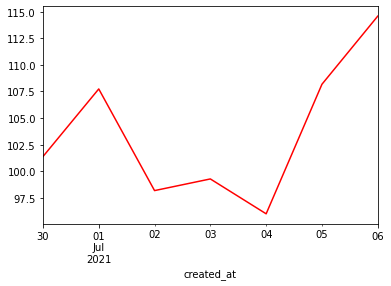

In [ ]:
short_tweets['text'].str.len().resample('D').mean().plot(color='red') 

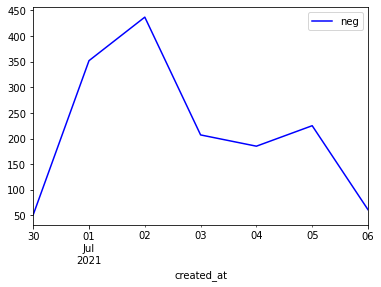

In [ ]:
short_tweets['negative'].resample('D').sum().plot(color = 'b',label = 'neg').legend() 

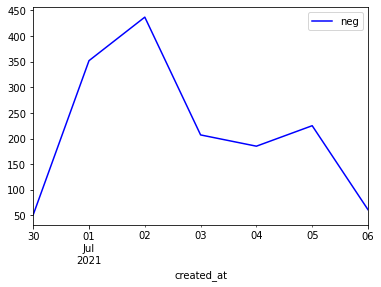

In [ ]:
short_tweets['negative'].resample('D').sum().plot(color = 'b',label = 'neg').legend() 

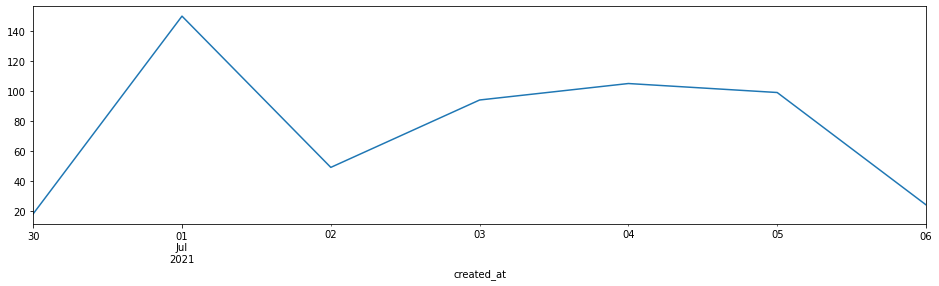

In [ ]:
short_tweets['anger'].resample('D').sum().plot(figsize=(16,4))

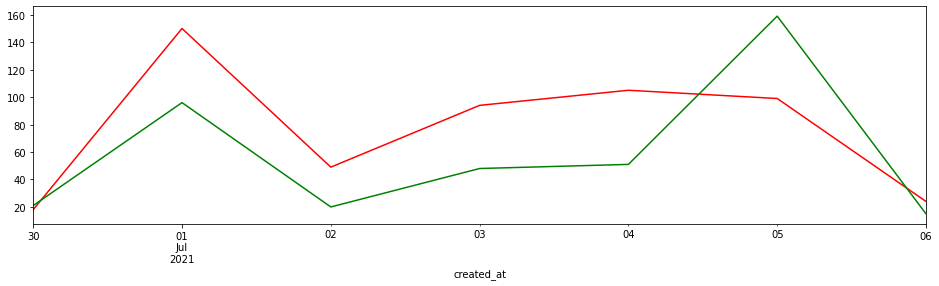

In [ ]:
ax = short_tweets['anger'].resample('D').sum().plot(figsize=(16,4), color = 'red')
short_tweets['joy'].resample('D').sum().plot(figsize=(16,4), ax = ax, color = 'green')

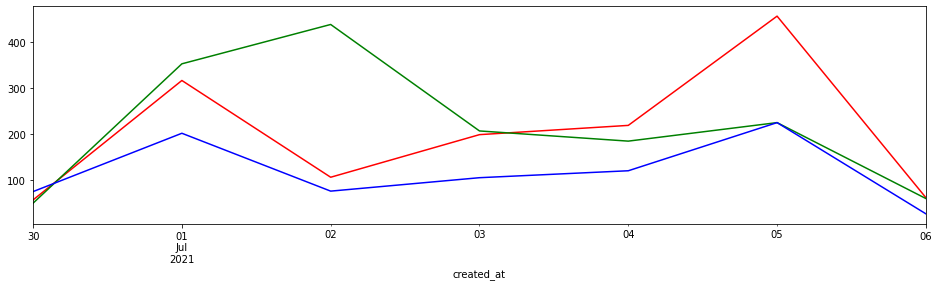

In [ ]:
ax = short_tweets['positivity'].resample('D').sum().plot(figsize=(16,4), color = 'red')
short_tweets['negative'].resample('D').sum().plot(figsize=(16,4), ax = ax, color = 'green')
short_tweets['trust'].resample('D').sum().plot(figsize=(16,4), ax = ax, color = 'blue')

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

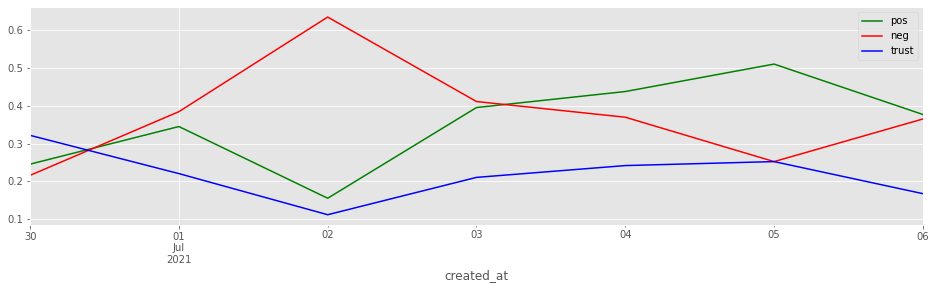

In [ ]:
ax = short_tweets['positivity'].resample('D').mean().plot(figsize=(16,4), 
                                                          color = 'g', label='pos')
short_tweets['negative'].resample('D').mean().plot(figsize=(16,4), ax = ax, 
                                                   label = 'neg', color = 'r')
short_tweets['trust'].resample('D').mean().plot(figsize=(16,4), ax = ax, 
                                                label = 'trust',color = 'blue').legend()